# Hello there! Let's do some KNN on real estate

The basics of this is to utilize King County real estate information freely available from the King Count Accessor's office and determine if we can figure out what a house is worth.

We do this by utilizing K (the number) neighbors based on distances.

In [19]:
# First step is to load the packages that are important

import pandas as pd
import numpy as np
import random
from scipy.spatial import KDTree
from sklearn.metrics import mean_absolute_error,  mean_squared_error
import sys
import matplotlib.pyplot as plt

In [20]:
#  Load up the king county geocoded data.

df = pd.read_csv('./data/king_county_data_geocoded.csv')
df

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784
3,523000.0,1872,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.537918,-122.392845
4,288000.0,3480,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.510227,-122.182167
5,319000.0,546348,2,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354980,-122.231277
6,523000.0,7221,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.699162,-122.280426
7,482000.0,12008,2,2,3,0,2,0,2,0,...,0,0,0,0,0,0,0,0,47.699230,-122.201538
8,228000.0,1017,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.730331,-122.355865
9,358000.0,1646,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,45.293430,-93.906406


In [21]:
df.columns

Index(['AppraisedValue', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'MtRainier', 'Olympics',
       'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView',
       'WfntLocation', 'WfntFootage', 'WfntBank', 'WfntPoorQuality',
       'WfntRestrictedAccess', 'WfntAccessRights', 'WfntProximityInfluence',
       'TidelandShoreland', 'LotDepthFactor', 'TrafficNoise', 'PowerLines',
       'OtherNuisances', 'NbrBldgSites', 'Contamination',
       'AdjacentGolfFairway', 'AdjacentGreenbelt', 'HistoricSite',
       'CurrentUseDesignation', 'NativeGrowthProtEsmt', 'Easements',
       'OtherDesignation', 'DeedRestrictions', 'DevelopmentRightsPurch',
       'WaterProblems', 'TranspConcurrency', 'OtherProblems', 'lat', 'long'],
      dtype='object')

In [37]:
from catboost import CatBoostRegressor, Pool

reg = CatBoostRegressor(eval_metric='MAE', use_best_model=True)

X = df[df.columns[~df.columns.isin(['AppraisedValue'])]]

scaler = MinMaxScaler()

# Note the below line is exactly the same as
# X = (X - X.min()) / (X.max() - X.min())
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg.fit(Pool(X_train, y_train), eval_set=Pool(X_test, y_test))

0:	learn: 395001.7692919	test: 394531.9088251	best: 394531.9088251 (0)	total: 30ms	remaining: 30s
1:	learn: 383162.4438877	test: 382663.4840998	best: 382663.4840998 (1)	total: 64.1ms	remaining: 32s
2:	learn: 371709.3897721	test: 371188.9804735	best: 371188.9804735 (2)	total: 100ms	remaining: 33.4s
3:	learn: 360582.7649712	test: 360048.3953336	best: 360048.3953336 (3)	total: 133ms	remaining: 33s
4:	learn: 349794.4674425	test: 349250.8452597	best: 349250.8452597 (4)	total: 163ms	remaining: 32.3s
5:	learn: 339331.1118852	test: 338789.3343531	best: 338789.3343531 (5)	total: 195ms	remaining: 32.3s
6:	learn: 329188.3924616	test: 328639.4404658	best: 328639.4404658 (6)	total: 226ms	remaining: 32s
7:	learn: 319364.8202499	test: 318794.1335454	best: 318794.1335454 (7)	total: 277ms	remaining: 34.4s
8:	learn: 309847.5730854	test: 309262.7262770	best: 309262.7262770 (8)	total: 306ms	remaining: 33.7s
9:	learn: 300612.3179377	test: 300017.4146609	best: 300017.4146609 (9)	total: 336ms	remaining: 33.3

82:	learn: 95740.4107357	test: 94315.2720008	best: 94315.2720008 (82)	total: 3.31s	remaining: 36.6s
83:	learn: 95620.4243767	test: 94194.5364295	best: 94194.5364295 (83)	total: 3.36s	remaining: 36.6s
84:	learn: 95444.5875429	test: 94014.8009151	best: 94014.8009151 (84)	total: 3.4s	remaining: 36.6s
85:	learn: 95316.7761631	test: 93892.3672473	best: 93892.3672473 (85)	total: 3.44s	remaining: 36.5s
86:	learn: 95122.1772222	test: 93711.1540731	best: 93711.1540731 (86)	total: 3.47s	remaining: 36.5s
87:	learn: 94973.5104153	test: 93571.0833215	best: 93571.0833215 (87)	total: 3.51s	remaining: 36.4s
88:	learn: 94803.8746114	test: 93410.6261507	best: 93410.6261507 (88)	total: 3.56s	remaining: 36.4s
89:	learn: 94654.2653981	test: 93269.4467979	best: 93269.4467979 (89)	total: 3.59s	remaining: 36.3s
90:	learn: 94510.4408296	test: 93140.3105410	best: 93140.3105410 (90)	total: 3.63s	remaining: 36.3s
91:	learn: 94369.1122717	test: 93009.0996759	best: 93009.0996759 (91)	total: 3.68s	remaining: 36.3s
9

165:	learn: 89065.1592972	test: 88454.9885923	best: 88454.9885923 (165)	total: 6.95s	remaining: 34.9s
166:	learn: 89043.7179103	test: 88438.7097388	best: 88438.7097388 (166)	total: 7.03s	remaining: 35.1s
167:	learn: 88992.4422332	test: 88394.2555528	best: 88394.2555528 (167)	total: 7.11s	remaining: 35.2s
168:	learn: 88897.2927529	test: 88298.7675184	best: 88298.7675184 (168)	total: 7.21s	remaining: 35.5s
169:	learn: 88813.7288658	test: 88212.9817372	best: 88212.9817372 (169)	total: 7.3s	remaining: 35.7s
170:	learn: 88781.4153407	test: 88186.7564611	best: 88186.7564611 (170)	total: 7.38s	remaining: 35.8s
171:	learn: 88767.3862392	test: 88171.0170371	best: 88171.0170371 (171)	total: 7.45s	remaining: 35.9s
172:	learn: 88732.1097567	test: 88146.0657343	best: 88146.0657343 (172)	total: 7.53s	remaining: 36s
173:	learn: 88627.9602554	test: 88035.0312795	best: 88035.0312795 (173)	total: 7.61s	remaining: 36.1s
174:	learn: 88596.8237349	test: 88007.7537417	best: 88007.7537417 (174)	total: 7.67s	

247:	learn: 85837.2557567	test: 85547.9900178	best: 85547.9900178 (247)	total: 10.6s	remaining: 32.2s
248:	learn: 85805.7570704	test: 85525.3113708	best: 85525.3113708 (248)	total: 10.7s	remaining: 32.2s
249:	learn: 85727.5187749	test: 85456.8978855	best: 85456.8978855 (249)	total: 10.7s	remaining: 32.1s
250:	learn: 85710.1168373	test: 85442.9541293	best: 85442.9541293 (250)	total: 10.7s	remaining: 32.1s
251:	learn: 85640.2038142	test: 85376.5563371	best: 85376.5563371 (251)	total: 10.8s	remaining: 32s
252:	learn: 85572.8535485	test: 85308.9495279	best: 85308.9495279 (252)	total: 10.8s	remaining: 31.9s
253:	learn: 85565.3400352	test: 85301.9988543	best: 85301.9988543 (253)	total: 10.8s	remaining: 31.8s
254:	learn: 85546.7038027	test: 85283.3595456	best: 85283.3595456 (254)	total: 10.9s	remaining: 31.8s
255:	learn: 85464.5477251	test: 85202.8188150	best: 85202.8188150 (255)	total: 10.9s	remaining: 31.8s
256:	learn: 85462.2342448	test: 85200.9297733	best: 85200.9297733 (256)	total: 10.9s

332:	learn: 83327.4712959	test: 83279.2346901	best: 83279.2346901 (332)	total: 13.8s	remaining: 27.5s
333:	learn: 83279.8665499	test: 83239.2655128	best: 83239.2655128 (333)	total: 13.8s	remaining: 27.5s
334:	learn: 83265.5640880	test: 83231.5815752	best: 83231.5815752 (334)	total: 13.8s	remaining: 27.5s
335:	learn: 83240.8800747	test: 83212.4917744	best: 83212.4917744 (335)	total: 13.9s	remaining: 27.4s
336:	learn: 83195.9023095	test: 83167.9746239	best: 83167.9746239 (336)	total: 13.9s	remaining: 27.4s
337:	learn: 83192.9419487	test: 83166.4913481	best: 83166.4913481 (337)	total: 13.9s	remaining: 27.3s
338:	learn: 83164.2759681	test: 83140.9905796	best: 83140.9905796 (338)	total: 14s	remaining: 27.3s
339:	learn: 83151.3880058	test: 83131.3058894	best: 83131.3058894 (339)	total: 14s	remaining: 27.2s
340:	learn: 83140.5210441	test: 83124.5936696	best: 83124.5936696 (340)	total: 14.1s	remaining: 27.2s
341:	learn: 83135.9380861	test: 83123.2617156	best: 83123.2617156 (341)	total: 14.1s	r

414:	learn: 81396.6710892	test: 81521.4812681	best: 81521.4812681 (414)	total: 16.8s	remaining: 23.6s
415:	learn: 81395.5170269	test: 81520.7974160	best: 81520.7974160 (415)	total: 16.8s	remaining: 23.6s
416:	learn: 81393.2191504	test: 81520.8065611	best: 81520.7974160 (415)	total: 16.8s	remaining: 23.5s
417:	learn: 81380.3689198	test: 81509.8099121	best: 81509.8099121 (417)	total: 16.9s	remaining: 23.5s
418:	learn: 81377.3874598	test: 81507.1577460	best: 81507.1577460 (418)	total: 16.9s	remaining: 23.4s
419:	learn: 81320.1638861	test: 81453.5925869	best: 81453.5925869 (419)	total: 16.9s	remaining: 23.4s
420:	learn: 81278.0874421	test: 81410.5528400	best: 81410.5528400 (420)	total: 17s	remaining: 23.3s
421:	learn: 81263.4894335	test: 81397.4860542	best: 81397.4860542 (421)	total: 17s	remaining: 23.3s
422:	learn: 81233.9750017	test: 81372.5407976	best: 81372.5407976 (422)	total: 17.1s	remaining: 23.3s
423:	learn: 81192.9288461	test: 81332.0313667	best: 81332.0313667 (423)	total: 17.1s	r

496:	learn: 80199.2678426	test: 80459.7331785	best: 80459.7331785 (496)	total: 19.7s	remaining: 19.9s
497:	learn: 80182.0883172	test: 80447.2826532	best: 80447.2826532 (497)	total: 19.7s	remaining: 19.9s
498:	learn: 80177.5154224	test: 80443.1619219	best: 80443.1619219 (498)	total: 19.7s	remaining: 19.8s
499:	learn: 80176.3877412	test: 80442.2602986	best: 80442.2602986 (499)	total: 19.8s	remaining: 19.8s
500:	learn: 80173.6002045	test: 80440.6449831	best: 80440.6449831 (500)	total: 19.8s	remaining: 19.7s
501:	learn: 80166.0494941	test: 80434.9906974	best: 80434.9906974 (501)	total: 19.8s	remaining: 19.7s
502:	learn: 80144.0043784	test: 80409.9517824	best: 80409.9517824 (502)	total: 19.9s	remaining: 19.6s
503:	learn: 80141.7465966	test: 80407.6509178	best: 80407.6509178 (503)	total: 19.9s	remaining: 19.6s
504:	learn: 80133.8104559	test: 80402.2385658	best: 80402.2385658 (504)	total: 19.9s	remaining: 19.5s
505:	learn: 80130.8310060	test: 80400.6014804	best: 80400.6014804 (505)	total: 20s

579:	learn: 79163.2997677	test: 79526.3703774	best: 79526.0121454 (578)	total: 22.6s	remaining: 16.3s
580:	learn: 79145.2932503	test: 79515.0401979	best: 79515.0401979 (580)	total: 22.6s	remaining: 16.3s
581:	learn: 79144.5447617	test: 79514.7803791	best: 79514.7803791 (581)	total: 22.7s	remaining: 16.3s
582:	learn: 79131.9118161	test: 79499.2287532	best: 79499.2287532 (582)	total: 22.7s	remaining: 16.2s
583:	learn: 79131.5518232	test: 79498.7402727	best: 79498.7402727 (583)	total: 22.7s	remaining: 16.2s
584:	learn: 79130.4621591	test: 79498.3444791	best: 79498.3444791 (584)	total: 22.7s	remaining: 16.1s
585:	learn: 79099.4926349	test: 79467.6540362	best: 79467.6540362 (585)	total: 22.8s	remaining: 16.1s
586:	learn: 79060.1521620	test: 79429.5276501	best: 79429.5276501 (586)	total: 22.8s	remaining: 16.1s
587:	learn: 79059.0955818	test: 79428.4647526	best: 79428.4647526 (587)	total: 22.9s	remaining: 16s
588:	learn: 79035.3725343	test: 79402.9283040	best: 79402.9283040 (588)	total: 22.9s

663:	learn: 78212.2458847	test: 78667.6237817	best: 78667.6237817 (663)	total: 25.7s	remaining: 13s
664:	learn: 78199.1396169	test: 78656.1977353	best: 78656.1977353 (664)	total: 25.7s	remaining: 13s
665:	learn: 78152.6796464	test: 78612.1127495	best: 78612.1127495 (665)	total: 25.8s	remaining: 12.9s
666:	learn: 78125.1148657	test: 78580.8501160	best: 78580.8501160 (666)	total: 25.8s	remaining: 12.9s
667:	learn: 78120.3006485	test: 78575.6020837	best: 78575.6020837 (667)	total: 25.8s	remaining: 12.8s
668:	learn: 78116.3839491	test: 78572.8422975	best: 78572.8422975 (668)	total: 25.9s	remaining: 12.8s
669:	learn: 78116.0307224	test: 78572.9441284	best: 78572.8422975 (668)	total: 25.9s	remaining: 12.8s
670:	learn: 78102.6076446	test: 78559.4792449	best: 78559.4792449 (670)	total: 25.9s	remaining: 12.7s
671:	learn: 78102.0773320	test: 78559.0243932	best: 78559.0243932 (671)	total: 26s	remaining: 12.7s
672:	learn: 78100.5344166	test: 78559.9345132	best: 78559.0243932 (671)	total: 26s	remai

746:	learn: 77379.0014327	test: 77924.1343766	best: 77924.0837100 (745)	total: 28.6s	remaining: 9.69s
747:	learn: 77365.9484478	test: 77911.0617820	best: 77911.0617820 (747)	total: 28.7s	remaining: 9.65s
748:	learn: 77362.6583966	test: 77908.2687441	best: 77908.2687441 (748)	total: 28.7s	remaining: 9.61s
749:	learn: 77355.4276233	test: 77902.5934243	best: 77902.5934243 (749)	total: 28.7s	remaining: 9.57s
750:	learn: 77354.7154581	test: 77902.1708905	best: 77902.1708905 (750)	total: 28.7s	remaining: 9.53s
751:	learn: 77346.2702403	test: 77898.0736955	best: 77898.0736955 (751)	total: 28.8s	remaining: 9.49s
752:	learn: 77334.6694443	test: 77885.8461849	best: 77885.8461849 (752)	total: 28.9s	remaining: 9.47s
753:	learn: 77297.6361555	test: 77846.8927493	best: 77846.8927493 (753)	total: 28.9s	remaining: 9.44s
754:	learn: 77297.2192514	test: 77846.7447066	best: 77846.7447066 (754)	total: 28.9s	remaining: 9.39s
755:	learn: 77287.7741892	test: 77833.5106462	best: 77833.5106462 (755)	total: 29s

832:	learn: 76614.6896521	test: 77265.3457542	best: 77265.3457542 (832)	total: 31.9s	remaining: 6.39s
833:	learn: 76613.8126388	test: 77264.7754474	best: 77264.7754474 (833)	total: 31.9s	remaining: 6.36s
834:	learn: 76613.7866721	test: 77264.8169238	best: 77264.7754474 (833)	total: 32s	remaining: 6.32s
835:	learn: 76612.9806261	test: 77264.3016878	best: 77264.3016878 (835)	total: 32s	remaining: 6.28s
836:	learn: 76609.4798764	test: 77263.5907193	best: 77263.5907193 (836)	total: 32s	remaining: 6.24s
837:	learn: 76608.3877241	test: 77262.8127142	best: 77262.8127142 (837)	total: 32.1s	remaining: 6.2s
838:	learn: 76603.9852473	test: 77258.8363038	best: 77258.8363038 (838)	total: 32.1s	remaining: 6.16s
839:	learn: 76580.6078831	test: 77231.0609978	best: 77231.0609978 (839)	total: 32.1s	remaining: 6.12s
840:	learn: 76560.4905668	test: 77215.5857465	best: 77215.5857465 (840)	total: 32.2s	remaining: 6.09s
841:	learn: 76537.1726963	test: 77192.6636131	best: 77192.6636131 (841)	total: 32.2s	rema

917:	learn: 76090.1895352	test: 76810.9600660	best: 76810.8940907 (916)	total: 34.9s	remaining: 3.12s
918:	learn: 76090.0291627	test: 76810.8538005	best: 76810.8538005 (918)	total: 34.9s	remaining: 3.08s
919:	learn: 76089.5547416	test: 76811.5239151	best: 76810.8538005 (918)	total: 35s	remaining: 3.04s
920:	learn: 76081.5888592	test: 76801.4723723	best: 76801.4723723 (920)	total: 35s	remaining: 3s
921:	learn: 76049.7328306	test: 76773.9446337	best: 76773.9446337 (921)	total: 35s	remaining: 2.96s
922:	learn: 76038.0976519	test: 76764.5750371	best: 76764.5750371 (922)	total: 35.1s	remaining: 2.92s
923:	learn: 76038.0274274	test: 76764.7501024	best: 76764.5750371 (922)	total: 35.1s	remaining: 2.88s
924:	learn: 76030.5227722	test: 76754.7847795	best: 76754.7847795 (924)	total: 35.1s	remaining: 2.85s
925:	learn: 76005.9032269	test: 76729.0463617	best: 76729.0463617 (925)	total: 35.2s	remaining: 2.81s
926:	learn: 75982.1259844	test: 76706.4045034	best: 76706.4045034 (926)	total: 35.2s	remain

In [36]:
dict(zip(X.columns, reg.feature_importances_))

{'SqFtLot': 8.775393363582689,
 'WaterSystem': 0.21833691703894614,
 'SewerSystem': 1.725161277690263,
 'Access': 0.10313522504445034,
 'Topography': 0.22598154042110202,
 'StreetSurface': 0.15696503537322898,
 'RestrictiveSzShape': 0.02639562263631402,
 'InadequateParking': 0.5648670407295654,
 'PcntUnusable': 0.004394494868581169,
 'MtRainier': 0.024093824728734718,
 'Olympics': 0.6523188722607144,
 'Cascades': 0.07914446439098095,
 'Territorial': 3.864228107690003,
 'SeattleSkyline': 0.07847649932208979,
 'PugetSound': 1.6527501847533317,
 'LakeWashington': 1.1037057782696393,
 'LakeSammamish': 0.06596101395145479,
 'SmallLakeRiverCreek': 0.10554015694802281,
 'OtherView': 0.008727125804885296,
 'WfntLocation': 0.22055319366419884,
 'WfntFootage': 0.27946532510706124,
 'WfntBank': 0.2192805667903744,
 'WfntPoorQuality': 0.005683704759510528,
 'WfntRestrictedAccess': 0.03712712024245229,
 'WfntAccessRights': 0.11598833117480953,
 'WfntProximityInfluence': 0.009499024146322461,
 'Tide

In [29]:
reg.feature_importances_

array([59.68360504, 27.99430389, 12.32209107])

In [5]:
from sklearn.neighbors import KNeighborsRegressor

def regress(X, y, X_test, y_test, n_neighbors=2, metric='minkowski', p=2):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors, metric=metric, p=p)
    
    y_column = 'AppraisedValue'

    reg.fit(X, y)

    return round(mean_absolute_error(y_test, reg.predict(X_test)), 2)

X = df[['lat', 'long', 'SqFtLot']]

# This normalizes using MinMaxScaling you can also use others
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
# The biggest issue is that the data comes in biased towards Seattle and biased
# towards a size of house > 900 sqft.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Note the below line is exactly the same as
# X = (X - X.min()) / (X.max() - X.min())
X = scaler.fit_transform(X)

# Try out some other columns if you want
# X = df[df.columns[~df.columns.isin(['AppraisedValue'])]]

# This is in dollar amounts
y = df['AppraisedValue']

# Try out some different n_neighbors or one of the distance metrics
# p = 2 for minkowski is a euclidean distance. p=1 is a manhattan distance.
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
# NOTE THAT n_neighbors=1 would be cheating in this case! so no cheating!
regress(X, y, X, y, n_neighbors=2, metric='minkowski', p=2)

43087.61

In [15]:
min = 0
max = 20



7039596.0

In [9]:
from sklearn.model_selection import train_test_split

# What happens when you change the test_size to 0.5 or 0.8 or 0.01?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Building model on 80% of the data
# Validating MAE on 20%

regress(X_train, y_train, X_test, y_test, n_neighbors=7, metric='minkowski', p=10)

75456.81

/home/hexgnu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


..

/home/hexgnu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


...

/home/hexgnu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


....

/home/hexgnu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


.....

/home/hexgnu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


......

/home/hexgnu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)


.......

/home/hexgnu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


........

/home/hexgnu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=9.
  % (min_groups, self.n_splits)), Warning)


.........

/home/hexgnu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


..........

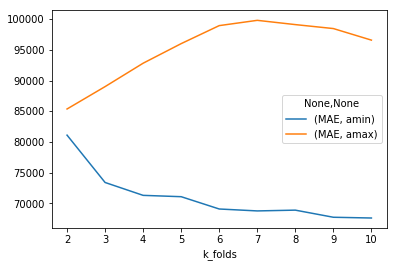

In [9]:
# Let's get more clever

from sklearn.model_selection import StratifiedKFold

error_data = []
for splits in range(2, 11):
    skf = StratifiedKFold(n_splits=splits)

    for train_index, test_index in skf.split(X, y):
        print('.', end='')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        error_data.append({'k_folds': splits,\
                           'MAE': regress(X_train, y_train, X_test, y_test, n_neighbors=6, metric='minkowski', p=2)\
                          })
pd.DataFrame(error_data).groupby('k_folds').agg({'MAE' : [np.min, np.max]}).plot()